<a href="https://colab.research.google.com/github/LucasDCunha/ProjetoED2/blob/master/projeto_aero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalando libs

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import data_table 
from matplotlib.pyplot import subplots

In [ ]:
!pip install --upgrade scipy networkx 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 35.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


#Lendo arquivos csv


In [ ]:
fluxo_aereo= pd.read_csv("/content/fluxoAereo.csv", sep = ";")
fluxo_aereo.head()

,ANO,MES,EMPRESA,ORIGEM,DESTINO,TARIFA,ASSENTOS
0,2022,8,ABJ,SBSV,SIRI,"690,00",5.0
1,2022,8,ABJ,SBSV,SIRI,"990,00",2.0
2,2022,8,ABJ,SBSV,SNCL,"490,00",100.0
3,2022,8,ABJ,SBSV,SNCL,"550,00",1.0
4,2022,8,ABJ,SBSV,SNCL,"750,00",2.0


In [ ]:
aero_publicos = pd.read_csv('/content/AeroPublicos.csv', sep=';', encoding='Latin-1')
aero_publicos.head()

,Código OACI,CIAD,Nome,Município,UF,Município Servido,UF Servido,LATGEOPOINT,LONGEOPOINT,Latitude,...,Superfície 1,Designação 2,Comprimento 2,Largura 2,Resistência 2,Superfície 2,Situação,Validade do Registro,Portaria de Registro,Link Portaria
0,SBRB,AC0001,Plácido de Castro,RIO BRANCO,Acre,Rio Branco,Acre,-9.868333,-67.898056,"09°52'06.0""S",...,Asfalto,NaN,NaN,NaN,NaN,NaN,Cadastrado,23/08/2028,PA2018-2577,https://pergamum.anac.gov.br/arquivos/PA2018-2...
1,SNGA,ES0007,Guarapari,GUARAPARI,Espírito Santo,Guarapari,Espírito Santo,-20.646389,-40.491667,"20°38'47.0""S",...,Asfalto,NaN,NaN,NaN,NaN,NaN,Cadastrado,06/11/2027,PA2017-3632,https://pergamum.anac.gov.br/arquivos/PA2017-3...
2,SBIZ,MA0002,Prefeito Renato Moreira,IMPERATRIZ,Maranhão,Imperatriz,Maranhão,-5.530556,-47.458333,"05°31'50.0""S",...,Asfalto,NaN,NaN,NaN,NaN,NaN,Cadastrado,24/07/2028,PA2018-2252,https://pergamum.anac.gov.br/arquivos/PA2018-2...
3,SBPC,MG0018,Embaixador Walther Moreira Salles,POÇOS DE CALDAS,Minas Gerais,Poços de Caldas,Minas Gerais,-21.837778,-46.566111,"21°50'16.0""S",...,Asfalto,NaN,NaN,NaN,NaN,NaN,Cadastrado,20/02/2029,PA2019-0534,https://pergamum.anac.gov.br/arquivos/PA2019-0...
4,SSCD,MS0007,Chapadão do Sul,CHAPADÃO DO SUL,Mato Grosso do Sul,Chapadão do Sul,Mato Grosso do Sul,-18.839167,-52.488056,"18°50'21.0""S",...,Asfalto,NaN,NaN,NaN,NaN,NaN,Cadastrado,01/10/2028,PA2018-2968,https://pergamum.anac.gov.br/arquivos/PA2018-2...


#Filtrando Dados

In [ ]:
fluxo_aereo = fluxo_aereo.drop(columns=['TARIFA','EMPRESA','ASSENTOS','ANO','MES'])


In [ ]:
aero_publicos = aero_publicos.drop(columns=['Município Servido', 'UF Servido', 'LATGEOPOINT', 'LONGEOPOINT', 'Latitude', 'Longitude', 'Altitude', 'Operação Diurna', 'Operação Noturna', 'Designação 1', 'Comprimento 1', 'Largura 1', 'Resistência 1', 'Superfície 1', 'Designação 2', 'Comprimento 2', 'Largura 2', 'Resistência 2', 'Superfície 2', 'Situação', 'Validade do Registro', 'Portaria de Registro', 'Link Portaria'])

In [ ]:
fluxo_aerodromos_origem = fluxo_aereo.merge(aero_publicos, left_on="ORIGEM", right_on="Código OACI", how="outer", suffixes=("_aeroPOrigem", "_fluxoAOrigem"))
fluxo_aerodromos = fluxo_aerodromos_origem.merge(aero_publicos, left_on="DESTINO", right_on="Código OACI", how="outer", suffixes=("_Origem", "_Destino"))

In [ ]:
fluxo_aerodromos = fluxo_aerodromos.dropna(axis=0)

# Criando Grafo

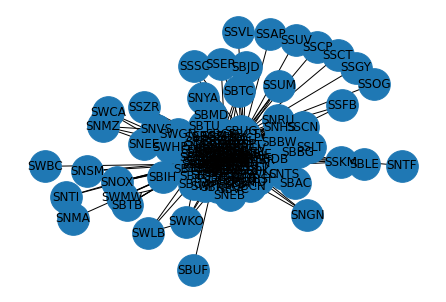

In [ ]:
# GRAFO TESTE
G = nx.from_pandas_edgelist(
    fluxo_aerodromos, 
    "ORIGEM", 
    "DESTINO", 
    
    create_using=nx.Graph()
)

nx.draw(G, with_labels=True,  node_size = 1000)

In [ ]:
fluxo_aerodromos = fluxo_aerodromos.groupby(['ORIGEM', 'DESTINO']).size().reset_index(name='VEZES')

In [ ]:
#Construcao do grafo
G = nx.Graph()

for index, row in fluxo_aerodromos.iterrows():
  G.add_edge(row['ORIGEM'], row['DESTINO'], weight = row['VEZES'])

In [ ]:
#Centralidade de Intermediação
nx.betweenness_centrality(G, weight='weight')

In [ ]:
#define aeros que não influenciam a rede
aeros_nao_influentes = [k for k, v in nx.betweenness_centrality(G, weight='weight').items() if v == 0]

In [ ]:
aeros_nao_influentes

['SNMA',
 'SNMZ',
 'SBUF',
 'SSAP',
 'SSCP',
 'SSCT',
 'SSER',
 'SSFB',
 'SSGY',
 'SSOG',
 'SSSC',
 'SSUV',
 'SSVL',
 'SWBC',
 'SWCA',
 'SWLB',
 'SBLE',
 'SNTF',
 'SBTB']

In [ ]:
#denife o rank de centralidade 
centralidade = nx.betweenness_centrality(G, weight='weight')
total_centralidade = []

for valor in centralidade.values():
  total_centralidade.append(valor)

total_centralidade.sort()

In [ ]:
aeros_mais_influentes = [k for k, v in nx.betweenness_centrality(G, weight='weight').items() if v >= total_centralidade[-10]]

In [ ]:
aeros_mais_influentes

['SBBE',
 'SBCT',
 'SBEG',
 'SBMA',
 'SBMD',
 'SBRJ',
 'SBSV',
 'SSGG',
 'SBTU',
 'SWHP']

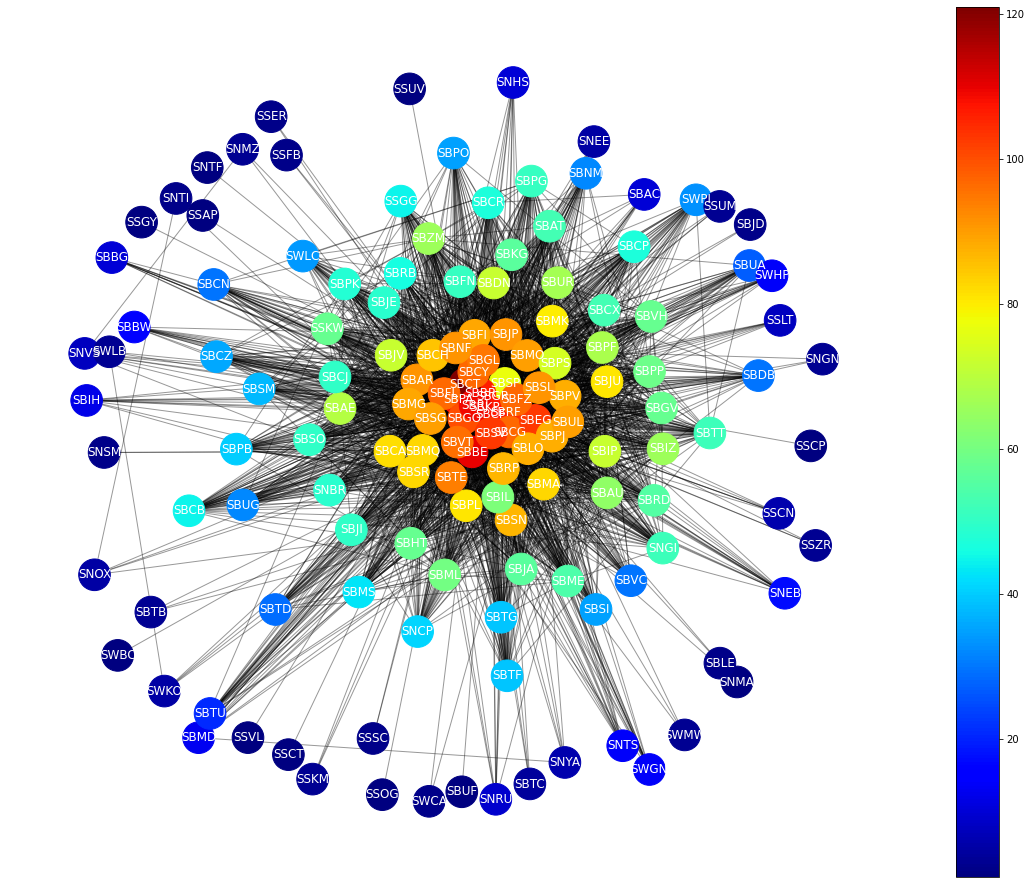

In [ ]:
# GRAFO 

fig, ax = plt.subplots(1,1,figsize=(20,16))

pos = nx.spring_layout(G, seed=123456789, k=3, weight='weight')

# cor dos nós
color = list(dict(nx.degree(G)).values())

# modelar arestas
nx.draw_networkx_edges(G, pos=pos, alpha=0.4, ax=ax)

# desenhar nós
nodes = nx.draw_networkx_nodes(G, pos=pos, node_size=1000, node_color=color, cmap=plt.cm.jet, ax=ax)

# desenhar rótulos
nx.draw_networkx_labels(G, pos=pos,font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=600)
plt.show()